<h1 style="color:#ffc0cb;font-size:70px;font-family:Georgia;text-align:center;"><strong>Logistic Regression</strong></h1>

# ✴️ Importing Necessary Libraries
****

In [1]:
import sys
!{sys.executable} -m pip -q install missingno

# import libraries which are pandas and numpy
import pandas as pd
import numpy as np
import missingno as msno


#for plots
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]= 15,10

#Libraries for plotting
# Modules for data visualization
import seaborn as sns
import missingno as msno
import matplotlib.patches as mpatches
sns.set_theme(style="ticks", color_codes=True) #set theme in seaborn
# scatter matrix library
from pandas.plotting import scatter_matrix
#set to show all columns
pd.set_option('display.max_columns', None)

#Libraries for feature scaling
from sklearn.preprocessing import StandardScaler

#Libraries for Validation
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

#Libraries for Training model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
# check the version of the packages
print("Numpy version: ", np.__version__)
print("Pandas version: ",pd.__version__)
! python --version

Numpy version:  1.20.3
Pandas version:  1.3.4
Python 3.9.7


# 📲 Data Retrieving
****

In [3]:
#Import data using functions of pandas
#Inside pandas.read_csv() method skipinitialspace parameter is use to skip initial space present in the dataframe. 
#By default, it is False, so skipinitialspace must be True to skip the whitespace.
#data is imported by "read_csv() function of pandas"
df = pd.read_csv("Data/nbaRookies.csv", delimiter=',', skipinitialspace = True)

df.columns = df.columns.str.replace(' ', '') #strip the extra-whitespaces out

print("The shape of the ORGINAL data is (row, column):", str(df.shape))

# drop Unnamed, it is just a number given to identify each house
df.head(3)

The shape of the ORGINAL data is (row, column): (1340, 21)


,Name,GP,MIN,PTS,FGM,FGA,FG%,3PMade,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0


# 📲 Data Information
****

In [4]:
print ("The shape of the data set before dropping duplicated:"+ str(df.shape))

df = df.drop_duplicates()

print ("The shape of the data set after dropping duplicated:"+ str(df.shape))

print (df.info())

The shape of the data set before dropping duplicated:(1340, 21)
The shape of the data set after dropping duplicated:(1328, 21)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1328 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         1328 non-null   object 
 1   GP           1328 non-null   int64  
 2   MIN          1328 non-null   float64
 3   PTS          1328 non-null   float64
 4   FGM          1328 non-null   float64
 5   FGA          1328 non-null   float64
 6   FG%          1328 non-null   float64
 7   3PMade       1328 non-null   float64
 8   3PA          1328 non-null   float64
 9   3P%          1318 non-null   float64
 10  FTM          1328 non-null   float64
 11  FTA          1328 non-null   float64
 12  FT%          1328 non-null   float64
 13  OREB         1328 non-null   float64
 14  DREB         1328 non-null   float64
 15  REB          1328 non-null   float64
 16  AST  

# ❌ Rename columns
***

In [5]:
df.rename(columns={"FG%": "FG", "3P%": "P_3", "FT%": "FT"}, inplace=True)

# 🕵️ Check contents:

In [6]:
df.describe()

,GP,MIN,PTS,FGM,FGA,FG,3PMade,3PA,P_3,FTM,FTA,FT,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
count,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.00000,1318.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000
mean,60.411145,17.634413,6.804217,2.630271,5.885542,44.184639,0.247741,0.77869,19.322989,1.298117,1.822139,70.325226,1.009714,2.027636,3.036446,1.551205,0.619051,0.368675,1.193599,0.620482
std,17.416688,8.322560,4.361669,1.684918,3.595394,6.132759,0.384548,1.06351,16.045404,0.987329,1.322653,10.562158,0.777551,1.362236,2.060241,1.475731,0.410972,0.429680,0.723966,0.485450
min,11.000000,3.100000,0.700000,0.300000,0.800000,23.800000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.300000,0.000000,0.000000,0.000000,0.100000,0.000000
25%,47.000000,10.875000,3.700000,1.400000,3.300000,40.200000,0.000000,0.00000,0.000000,0.600000,0.900000,64.700000,0.400000,1.000000,1.500000,0.600000,0.300000,0.100000,0.700000,0.000000
50%,63.000000,16.100000,5.550000,2.100000,4.800000,44.100000,0.100000,0.30000,22.450000,1.000000,1.500000,71.250000,0.800000,1.700000,2.500000,1.100000,0.500000,0.200000,1.000000,1.000000
75%,77.000000,22.900000,8.800000,3.400000,7.500000,47.900000,0.400000,1.12500,32.575000,1.600000,2.300000,77.600000,1.400000,2.600000,4.000000,2.000000,0.800000,0.500000,1.500000,1.000000
max,82.000000,40.900000,28.200000,10.200000,19.800000,73.700000,2.300000,6.50000,100.000000,7.700000,10.200000,100.000000,5.300000,9.600000,13.900000,10.600000,2.500000,3.900000,4.400000,1.000000


Text(0.5, 1, 'Box-Plot Distribution')

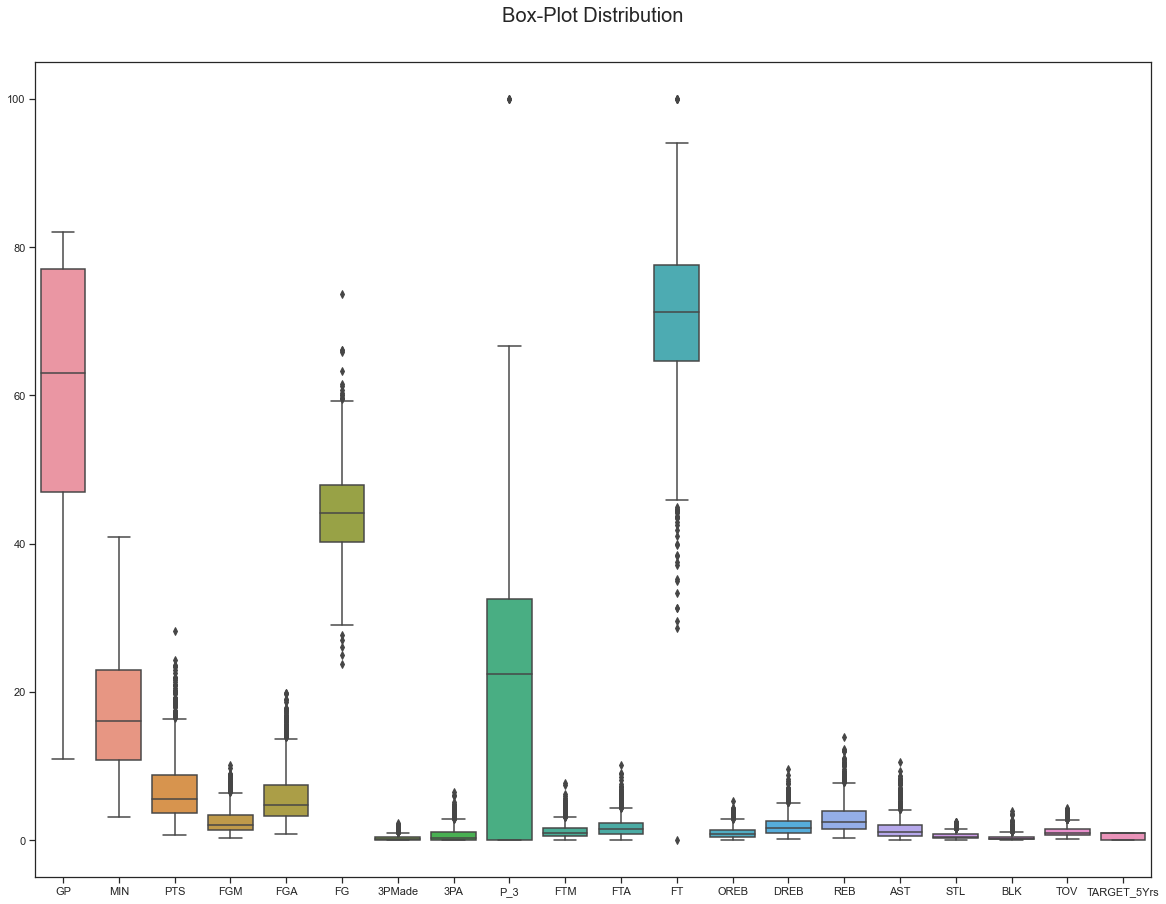

In [7]:
plt.rcParams['figure.figsize'] = [20, 15]
#Plot the box plot to sea outlier
sns.boxplot(data=df,orient="v")
plt.title("Box-Plot Distribution", y = 1,fontsize=20,pad = 40)

# ❌ Drop column
***

Missing values in the dataframe in descending: 
      Total  Percent
P_3     10     0.75


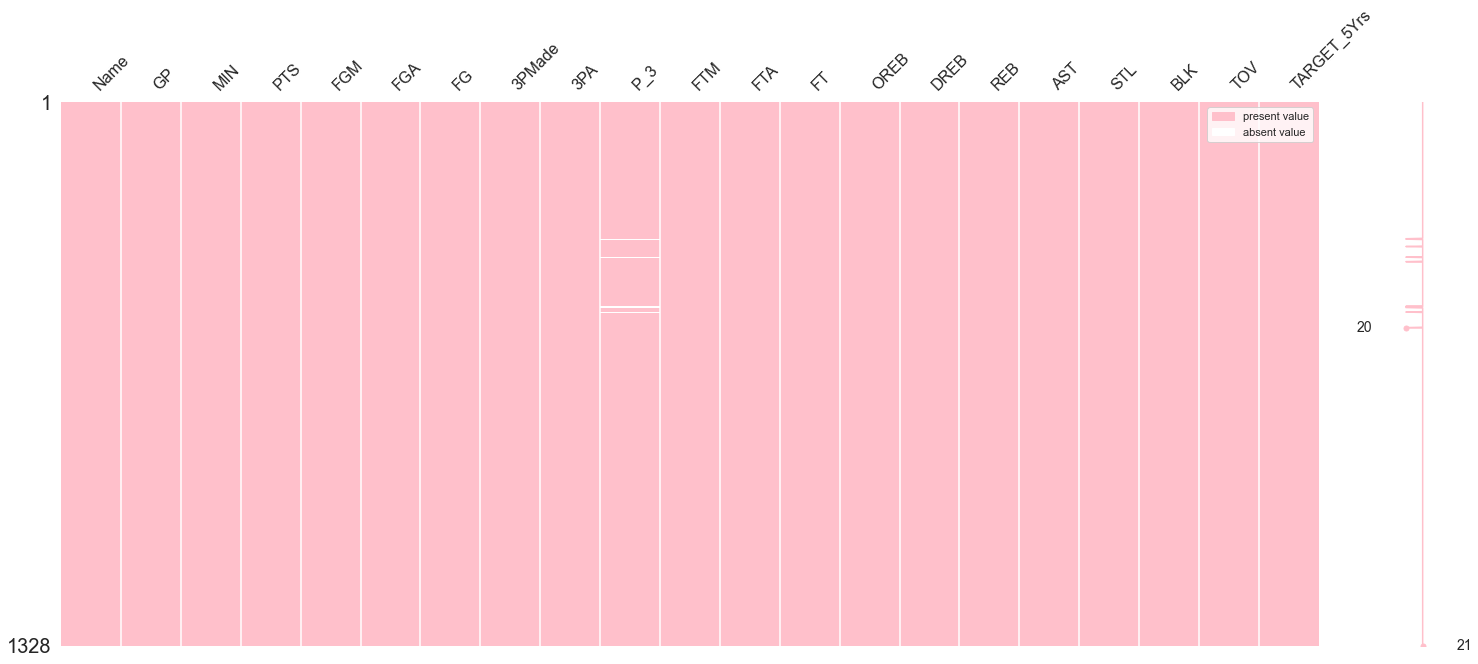

In [8]:
def missing_percentage(df):
    """This function takes a DataFrame(df) as input and returns two columns, total missing values and total missing values percentage"""
    total = df.isnull().sum().sort_values(ascending=False)[df.isnull().sum().sort_values(ascending=False) != 0]
    percent = round(df.isnull().sum().sort_values(ascending=False) / len(df) * 100, 2)[
        round(df.isnull().sum().sort_values(ascending=False) / len(df) * 100, 2) != 0]
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

# display missing values in descending
print("Missing values in the dataframe in descending: \n", missing_percentage(df).sort_values(by='Total', ascending=False))

# visualize where the missing values are located
msno.matrix(df, color=(255 / 255, 192 / 255, 203 / 255))
pink_patch = mpatches.Patch(color='pink', label='present value')
white_patch = mpatches.Patch(color='white', label='absent value')
plt.legend(handles=[pink_patch, white_patch])
plt.show()

### ---------> OBSERVATION
***
I still want to fill it, not need to drop.

In [9]:
df[df.P_3.isnull()]

,Name,GP,MIN,PTS,FGM,FGA,FG,3PMade,3PA,P_3,FTM,FTA,FT,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
338,Ken Johnson,64,12.7,4.1,1.8,3.3,52.8,0.0,0.0,NaN,0.6,1.3,43.5,1.4,2.4,3.8,0.3,0.2,0.3,0.9,0.0
340,Pete Williams,53,10.8,2.8,1.3,2.1,60.4,0.0,0.0,NaN,0.3,0.8,42.5,0.9,1.9,2.8,0.3,0.4,0.4,0.4,0.0
358,Melvin Turpin,79,24.7,10.6,4.6,9.0,51.1,0.0,0.0,NaN,1.4,1.8,78.4,2.0,3.8,5.7,0.5,0.5,1.1,1.5,1.0
386,Jim Petersen,60,11.9,3.2,1.2,2.4,48.6,0.0,0.0,NaN,0.8,1.1,75.8,0.7,1.7,2.5,0.5,0.2,0.5,1.2,1.0
397,Tom Scheffler,39,6.9,1.3,0.5,1.3,41.2,0.0,0.0,NaN,0.3,0.5,50.0,0.5,1.5,1.9,0.3,0.2,0.3,0.4,0.0
507,Sam Williams,59,18.2,6.1,2.6,4.7,55.6,0.0,0.0,NaN,0.8,1.5,55.1,1.5,3.7,5.2,0.6,0.8,1.3,1.1,0.0
509,Kurt Nimphius,63,17.2,5.3,2.2,4.7,46.1,0.0,0.0,NaN,1.0,1.7,58.3,1.5,3.2,4.7,1.0,0.3,1.3,0.9,1.0
510,Pete Verhoeven,71,17.0,4.9,2.1,4.2,50.3,0.0,0.0,NaN,0.7,1.0,70.8,1.5,2.1,3.6,0.7,0.6,0.3,0.8,1.0
521,Jim Smith,72,11.9,2.9,1.2,2.3,50.9,0.0,0.0,NaN,0.5,1.2,45.9,1.0,1.5,2.5,0.6,0.3,0.7,0.7,0.0
559,Jeff Wilkins,56,18.9,4.7,2.1,4.6,45.0,0.0,0.0,NaN,0.5,0.7,67.5,1.1,3.8,4.9,0.7,0.6,0.8,1.1,1.0


### ---------> OBSERVATION
***
I just want to fill na with 0.

In [10]:
df['P_3'] = df['P_3'].fillna(0)

# ⛏ Drop multi-correlation

/var/folders/l5/0ygc5m0x66xc7d4v2qzjjv0h0000gn/T/ipykernel_8232/95364943.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df.corr(), dtype=np.bool)


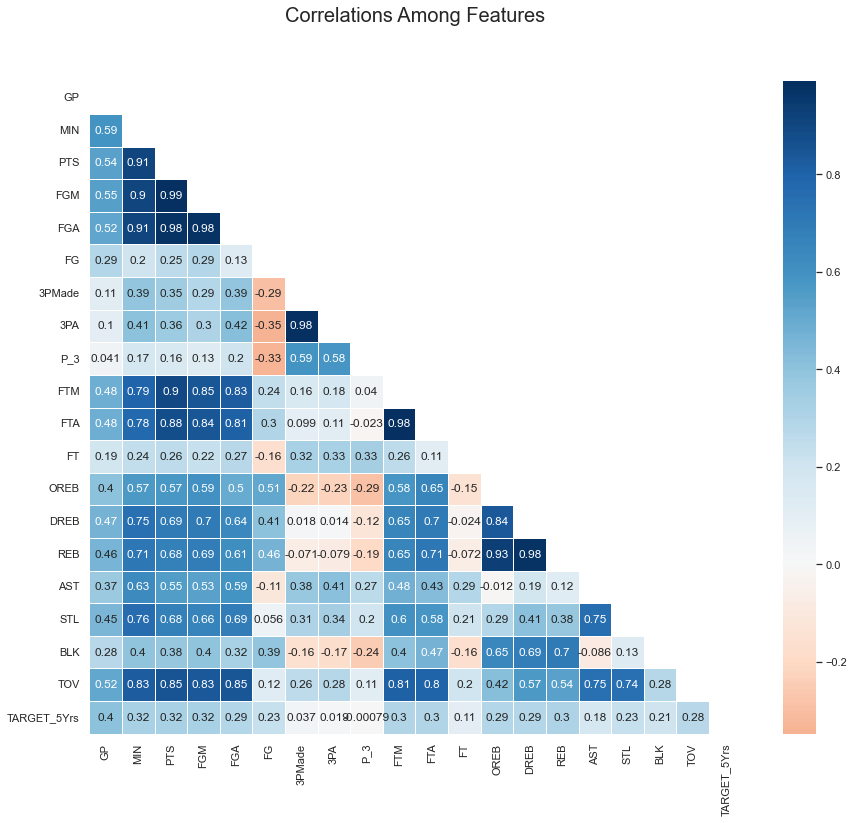

In [11]:
## heatmeap to see the correlation between features. 
# Generate a mask for the upper triangle (taken from seaborn example gallery)
import numpy as np
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.set_style('whitegrid')
plt.subplots(figsize = (15,12))
sns.heatmap(df.corr(), 
            annot=True,
            mask = mask,
            cmap = 'RdBu', ## in order to reverse the bar replace "RdBu" with "RdBu_r"
            linewidths=.9, 
            linecolor='white',
            fmt='.2g',
            center = 0,
            square=True)
plt.title("Correlations Among Features", y = 1.03,fontsize = 20, pad = 40);

In [12]:
df = df.drop(columns=['MIN', 'PTS', 'FGM', '3PMade', 'FTM', 'OREB', 'FGA', 'FTA', 'DREB', 'REB', 'AST', 'STL', 
                      'GP', '3PA'
                     ])

# Encoding
****

In [13]:
import category_encoders as ce

#Create object for binary encoding
encoder= ce.BinaryEncoder(cols=['Name'],return_df=True)

#Fit and Transform Data 
df=encoder.fit_transform(df) 
df

,Name_0,Name_1,Name_2,Name_3,Name_4,Name_5,Name_6,Name_7,Name_8,Name_9,Name_10,FG,P_3,FT,BLK,TOV,TARGET_5Yrs
0,0,0,0,0,0,0,0,0,0,0,1,34.7,25.0,69.9,0.4,1.3,0.0
1,0,0,0,0,0,0,0,0,0,1,0,29.6,23.5,76.5,0.5,1.6,0.0
2,0,0,0,0,0,0,0,0,0,1,1,42.2,24.4,67.0,0.3,1.0,0.0
3,0,0,0,0,0,0,0,0,1,0,0,42.6,22.6,68.9,0.1,1.0,1.0
4,0,0,0,0,0,0,0,0,1,0,1,52.4,0.0,67.4,0.4,0.8,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,1,0,1,0,0,0,0,1,0,1,0,43.3,14.3,79.2,0.2,0.8,0.0
1336,1,0,1,0,0,0,0,1,0,1,1,35.8,16.7,79.4,0.0,1.3,1.0
1337,1,0,1,0,0,0,0,1,1,0,0,55.0,0.0,64.3,0.4,0.9,0.0
1338,1,0,1,0,0,0,0,1,1,0,1,43.9,10.0,62.5,0.1,0.8,1.0


# 🛠 Feature Engineering

## Splitting the training data

In [14]:
#Target variable in y
y = df["TARGET_5Yrs"]

# separating our independent and dependent variable
X = df.drop(['TARGET_5Yrs'], axis = 1)


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = .30, random_state=42)

print("Length of X_train: " + str(len(X_train)))
print("Length of X_test: " + str(len(X_test)))

Length of X_train: 929
Length of X_test: 399


## 📏 Feature Scaling

In [16]:
# Feature Scaling
## We will be using standardscaler to transform

st_scale = StandardScaler()

## transforming "train_x"
X_train = st_scale.fit_transform(X_train)
## transforming "test_x"
X_test = st_scale.transform(X_test)

# Class Imbalancing
***

In [17]:
df['TARGET_5Yrs'].value_counts(normalize=True, dropna=False)

1.0    0.620482
0.0    0.379518
Name: TARGET_5Yrs, dtype: float64

# Model Training
***
- C specifies the amount of weighting placed on minimising the error. The standard implementation of logistic regression in Scikit learn includes regularisation, something to prevent overfitting. But as we haven’t learnt it yet, we don’t use regularisation by setting C to a large value, which effectively negates the regularisation. 
- The max_iter is the maximum number of iterations to fit parameters to the model. Although typically not a parameter that we tune too much, to demonstrate how parameter tuning works we will try various settings of max_iter to find the best setting (for the data).



In [18]:
#Initialise the logistic model
logRegNba = LogisticRegression(C=10000, max_iter=100, solver='liblinear')


## Fit the model with "train_x" and "train_y"
logRegNba.fit(X_train,y_train)

## Use the "X_test" to predict the model outcome -> evaluate the outcome of model.
y_pred = logRegNba.predict(X_test)


# Model Validation
***
> I use F1 score, accuracy score.

In [19]:
from sklearn.metrics import f1_score, accuracy_score
print("F1 Score:" + str(f1_score(y_test, y_pred)))
print("Accuracy Score:" + str(accuracy_score (y_test, y_pred)))

F1 Score:0.8014842300556586
Accuracy Score:0.731829573934837


In [20]:
sc = st_scale

## Using StratifiedShuffleSplit
## We can use KFold, StratifiedShuffleSplit, StratiriedKFold or ShuffleSplit, They are all close cousins. look at sklearn userguide for more info.   
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score
cv = StratifiedShuffleSplit(n_splits = 10, test_size = .25, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%
## Using standard scale for the whole dataset.

## saving the feature names for decision tree display
column_names = X.columns

X = sc.fit_transform(X)
accuracies = cross_val_score(LogisticRegression(solver='liblinear'), X,y, cv  = cv)
print ("Cross-Validation accuracy scores:{}".format(accuracies))
print ("Mean Cross-Validation accuracy score: {}".format(round(accuracies.mean(),5)))

Cross-Validation accuracy scores:[0.71084337 0.71385542 0.64759036 0.65963855 0.65060241 0.69277108
 0.68072289 0.72289157 0.68975904 0.69277108]
Mean Cross-Validation accuracy score: 0.68614


# Parameter Tuning
*****

In [34]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score

## C_vals is the alpla value of lasso and ridge regression(as alpha increases the model complexity decreases,)
## remember effective alpha scores are 0<alpha<infinity 
C_vals = [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,12,13,14,15,16,16.5,17,17.5,18]
## Choosing penalties(Lasso(l1) or Ridge(l2))
penalties = ['l2']
lMaxIter = [2,5, 100]
solvers = ['newton-cg', 'lbfgs', 'liblinear']



## Choose a cross validation strategy. 
cv = StratifiedShuffleSplit(n_splits = 10, test_size = .25)

## setting param for param_grid in GridSearchCV. 
param = {'penalty': penalties, 'C': C_vals, 'solver': solvers, 'max_iter':lMaxIter}

logreg = LogisticRegression(solver='liblinear')
## Calling on GridSearchCV object. 
grid = GridSearchCV(estimator=LogisticRegression(), 
                           param_grid = param,
                           scoring = 'accuracy',
                            n_jobs =-1,
                           cv = cv
                          )
## Fitting the model
grid.fit(X, y)

/Users/huynhchau/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/huynhchau/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/huynhchau/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/huynhchau/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/huynhchau/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/huynhchau/opt/anaconda3/lib/pytho

/Users/huynhchau/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/huynhchau/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/huynhchau/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/huynhchau/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/huynhchau/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/huynhchau/opt/anaconda3/lib/python3.9/site-packages/s

/Users/huynhchau/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/huynhchau/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/huynhchau/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/huynhchau/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/huynhchau/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/huynhchau/opt/anaconda3/lib/python3.9/sit

/Users/huynhchau/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/huynhchau/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/huynhchau/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/huynhchau/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: Conv

/Users/huynhchau/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/huynhchau/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/huynhchau/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/huynhchau/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logis

/Users/huynhchau/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/huynhchau/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/huynhchau/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
 

/Users/huynhchau/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/huynhchau/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/huynhchau/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/huynhchau/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/huynhchau/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/huynhchau/opt/anaconda3/lib/python3.9

/Users/huynhchau/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/huynhchau/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/huynhchau/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/huynhchau/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/huynhchau/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/huynhchau/opt/anaconda3/lib/python3.9/site-packag

/Users/huynhchau/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/huynhchau/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/huynhchau/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/huynhchau/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:2

/Users/huynhchau/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/huynhchau/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/huynhchau/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/huynhchau/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/huynhchau/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/huynhchau/opt/anaconda3/lib/python3.9/site-pa

/Users/huynhchau/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/huynhchau/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/huynhchau/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/huynhchau/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/huynhchau/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or

/Users/huynhchau/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/huynhchau/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/huynhchau/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/huynhchau/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/huynhchau/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/huynhchau/opt/anaconda3/lib/python3.9

/Users/huynhchau/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/huynhchau/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

/Users/huynhchau/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/huynhchau/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/huynhchau/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    h

/Users/huynhchau/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/huynhchau/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/huynhchau/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/huynhchau/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/huynhchau/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/huynhchau/opt/anaconda3/lib/python3.9/site-packages/s

/Users/huynhchau/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/huynhchau/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/huynhchau/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/huynhchau/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/huynhchau/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/huynhchau/opt/anaconda3/lib/python3.9/sit

/Users/huynhchau/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/huynhchau/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

/Users/huynhchau/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/huynhchau/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/huynhchau/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/huynhchau/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.

/Users/huynhchau/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/huynhchau/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=None, test_size=0.25,
            train_size=None),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3,
                               4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 16.5,
                               17, 17.5, 18],
                         'max_iter': [2, 5, 100], 'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [35]:
## Getting the best of everything. 
print (grid.best_score_)
print (grid.best_params_)
print(grid.best_estimator_)

0.6762048192771084
{'C': 0.2, 'max_iter': 2, 'penalty': 'l2', 'solver': 'lbfgs'}
LogisticRegression(C=0.2, max_iter=2)


In [36]:
### Using the best parameters from the grid-search.
logreg_grid = grid.best_estimator_
logreg_grid.score(X,y)

0.6859939759036144